## Supervised Learning - Classification
### K Nearest Neighbor (kNN) Classifier

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Data 
##### https://www.ndbc.noaa.gov/histsearch.php?station=42035&year=2005&f1=&t1a=&v1a=&t1b=&v1b=&c1=&f2=&t2a=&v2a=&t2b=&v2b=&c2=&f3=&t3a=&v3a=&t3b=&v3b= 

Station42035Galveston2005WH_TP_CAT_SelNum_Complex.csv

Categories should have same numbers approximately

Categories Kept Numerical for Contour Plot Images

In [2]:
# Importing the dataset
dataset = pd.read_csv('Station42035Galveston2005WH_TP_CAT_SelNum_Complex.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

dataset.describe()

,WVHT,APD,CAT
count,53.000000,53.000000,53.000000
mean,3.258302,6.966226,0.622642
std,0.726400,1.206800,0.489364
min,2.410000,4.950000,0.000000
25%,2.630000,6.200000,0.000000
50%,2.840000,6.850000,1.000000
75%,4.000000,7.720000,1.000000
max,4.700000,10.420000,1.000000


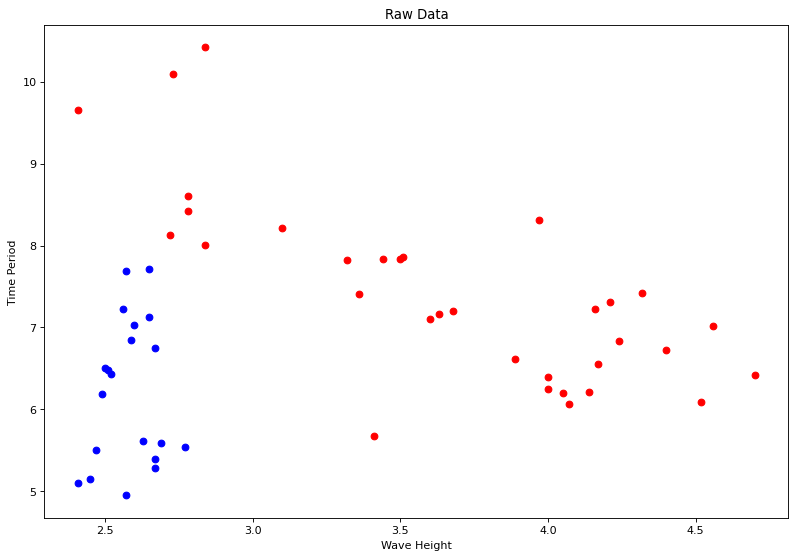

In [3]:
# Visualising the Raw Data
plt.figure(figsize=(12, 8), dpi=80)

XScat = X[dataset.CAT==0]
plt.scatter(XScat[:,0],XScat[:,1], color = 'blue')
XScat = X[dataset.CAT==1]
plt.scatter(XScat[:,0],XScat[:,1], color = 'red')

plt.title('Raw Data')
plt.xlabel('Wave Height')
plt.ylabel('Time Period')
plt.show()

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

The Minkowski distance is a metric in a normed vector space which can be considered as a generalization of both the
Euclidean distance and the Manhattan distance. It is named after the German mathematician Hermann Minkowski.

The Minkowski distance of order _p_ (where _p_ is an integer) between two points

__X__ = ($x_{1}$,$x_{2}$,..... ,$x_{n}$) and __Y__ = ($y_{1}$,$y_{2}$,... ,$y_{n}$) in $\mathbb{R}^{n}$ is defined as:
\begin{equation*}
\mathbf{D}\left(\mathbf{X},\mathbf{Y}\right) = \left(\sum_{i=1}^n |\mathbf{x_i}-\mathbf{y_i}|^\mathbf{p}\right)^\mathbf{1/p}
\end{equation*}
When p = 1, this is equivalent to using manhattan_distance (L1); and for p = 2, the euclidean_distance (L2).
For arbitrary p, minkowski_distance (Lp) is used.

In [6]:
# ONLY BLOCK TO CHANGE
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

C:\Users\PaulMKoola\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7 0]
 [0 4]]


C:\Users\PaulMKoola\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


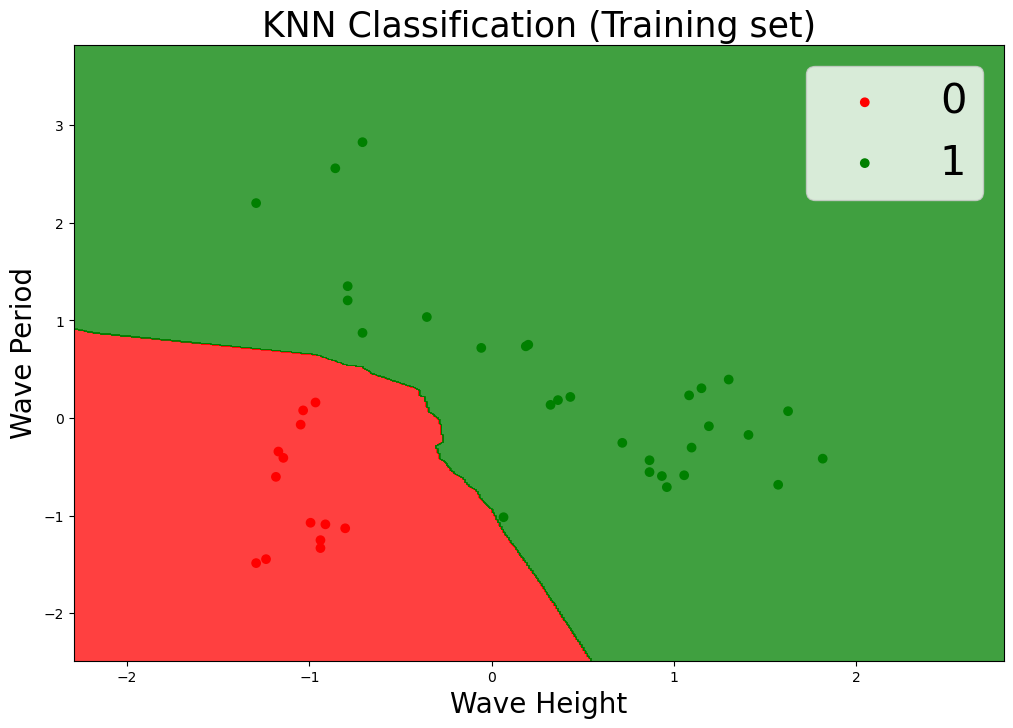

In [9]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

colors = np.array(['red', 'green'])
for i, j in enumerate(np.unique(y_set)):
    X1=X_set[y_set == j, 0]
    X2=X_set[y_set == j, 1]
    cArray = np.full(X1.shape, i)  
    plt.scatter(X1, X2, c = colors[cArray], label = j)
    
plt.title('KNN Classification (Training set)',fontsize=25)
plt.xlabel('Wave Height',fontsize=20)
plt.ylabel('Wave Period',fontsize=20)
plt.legend(fontsize=30)
# Control Size
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

C:\Users\PaulMKoola\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


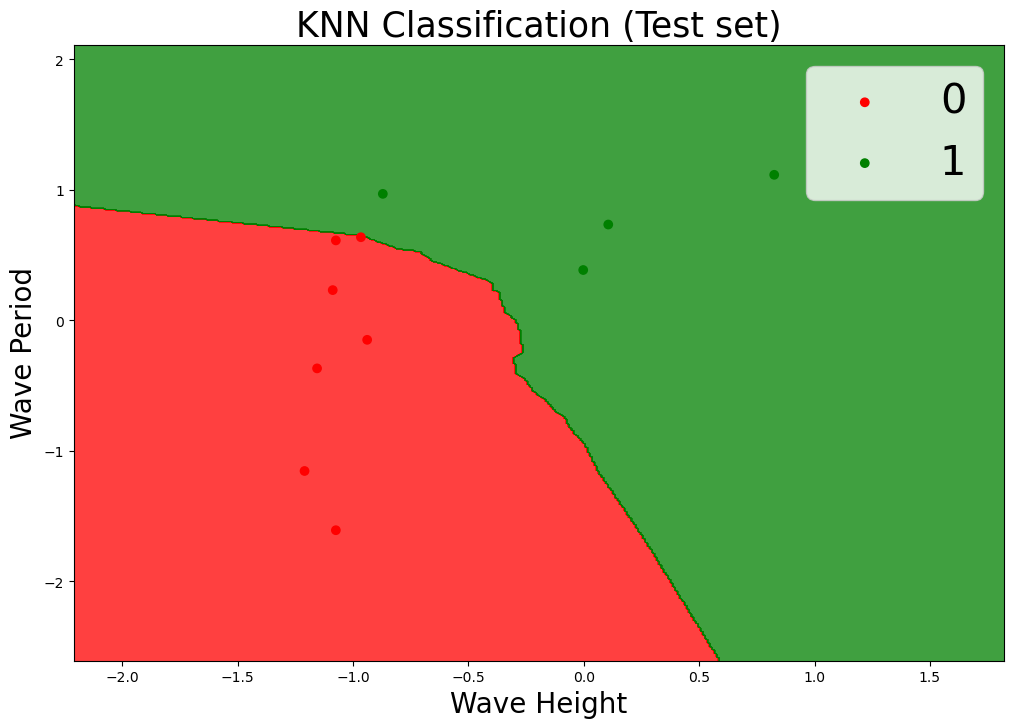

In [10]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

colors = np.array(['red', 'green'])
for i, j in enumerate(np.unique(y_set)):
    X1=X_set[y_set == j, 0]
    X2=X_set[y_set == j, 1]
    cArray = np.full(X1.shape, i)  
    plt.scatter(X1, X2, c = colors[cArray], label = j)

plt.title('KNN Classification (Test set)',fontsize=25)
plt.xlabel('Wave Height',fontsize=20)
plt.ylabel('Wave Period',fontsize=20)
plt.legend(fontsize=30)
# Control Size
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()